In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [39]:
tests = [r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores5.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores6.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores7.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores8.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores9.pkl",
         ]
trains = [r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores5.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores6.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores7.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores8.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores9.pkl",
          ]

test_arr = []
trains_arr = []

test_final = {}
trains_final = {}
for i in tests:
	with open(i, "rb") as f:       # load
		test_scores = pickle.load(f)

		test_arr.append(test_scores)

for test in test_arr:
	for param in test:
		if param in test_final:
			test_final[param].append(test[param])
		else:
			test_final[param] = [test[param]]

for key in test_final:
    test_final[key] = np.vstack(test_final[key])
    test_final[key] = np.mean(test_final[key], axis = 0)


for i in trains:
	with open(i, "rb") as f:       # load
		train_scores = pickle.load(f)
		trains_arr.append(train_scores)

for train in trains_arr:
	for param in train:
		if param in trains_final:
			trains_final[param].append(train[param])
		else:
			trains_final[param] = [train[param]]

for key in trains_final:
    trains_final[key] = np.vstack(trains_final[key])
    trains_final[key] = np.mean(trains_final[key], axis = 0)


with open("test_scores_final_heuristic.pkl", "wb") as f:       # save
    pickle.dump(test_final, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("train_scores_final_heuristic.pkl", "wb") as f:       # save
    pickle.dump(trains_final, f, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
with open(r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores_final_heuristic.pkl", "rb") as f:       # load
	train_scores = pickle.load(f)

for key in train_scores:
	print(key)
	window = 3000
	rolling = np.convolve(train_scores[key],
						np.ones(window)/window, mode='valid')
	plt.plot(rolling)
	plt.axhline(0,color='k',ls='--')
	plt.ylabel('BB / hand ({}-hand MA)'.format(window))
	plt.xlabel('Hand number')
	plt.title(str(window) + " Rolling Average | Random Opponent Training | Param Change - " +key)
	plt.ylim(-0.1, 0.2)
	plt.show()


NameError: name 'pickle' is not defined

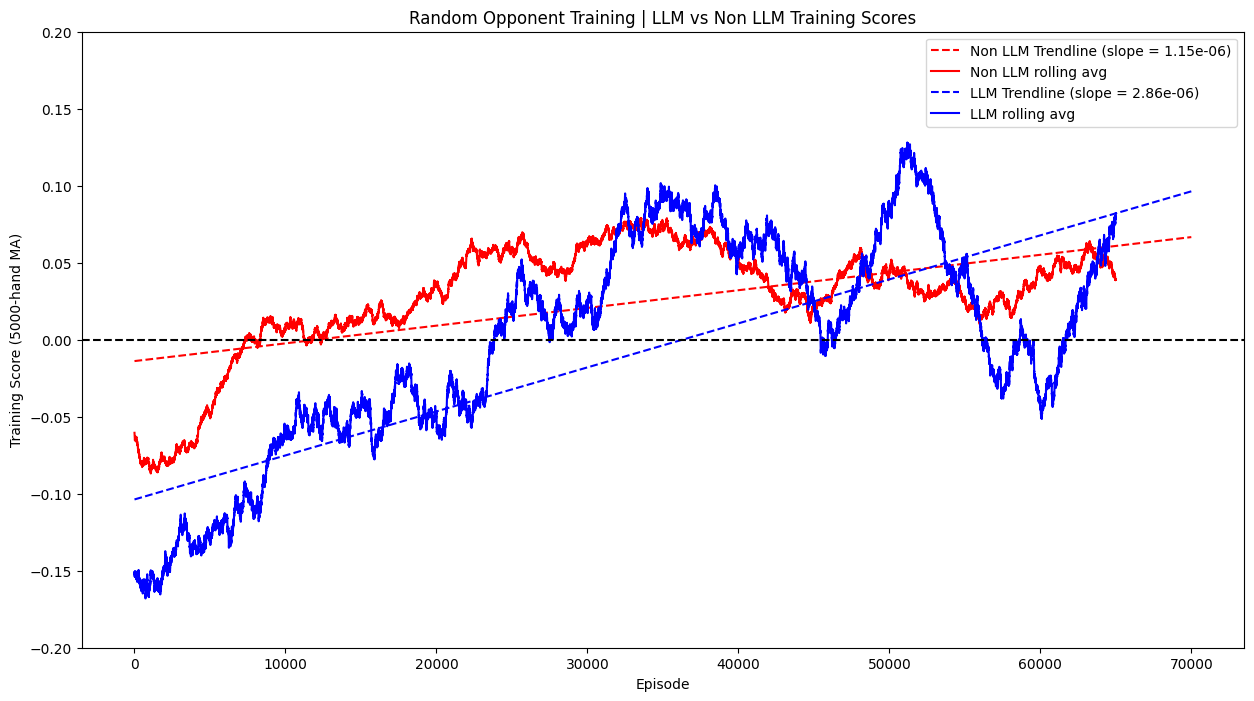

In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load your train_scores dictionary
with open(r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores_random_comparison.pkl", "rb") as f:
    train_scores = pickle.load(f)

with open(r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\random_agent_training_scores_LLM.pkl", "rb") as f:
    llm_train_scores = pickle.load(f)

slopes = []
plots = {}

# for key in train_scores:
window = 5000
x = np.arange(len(train_scores))
rolling = np.convolve(train_scores, np.ones(window)/window, mode='valid')
# Fit trendline
slope, intercept = np.polyfit(x, train_scores, 1)
trendline = slope * x + intercept

x_llm = np.arange(len(llm_train_scores))
rolling_llm = np.convolve(llm_train_scores, np.ones(window)/window, mode='valid')
slope_llm, intercept_llm = np.polyfit(x_llm, llm_train_scores, 1)
trendline_llm = slope_llm * x_llm + intercept_llm

plt.figure(figsize=(15, 8))
plt.plot(x, trendline, color='red', ls='--', label=f'Non LLM Trendline (slope = {slope:.2e})')
plt.plot(rolling, color='red', label=f'Non LLM rolling avg')
plt.plot(x_llm, trendline_llm, color='blue', ls='--', label=f'LLM Trendline (slope = {slope_llm:.2e})')
plt.plot(rolling_llm, color='blue', label=f'LLM rolling avg')
plt.axhline(0, color='k', ls='--')
plt.ylabel('Training Score ({}-hand MA)'.format(window))
plt.xlabel('Episode')
plt.title("Random Opponent Training | LLM vs Non LLM Training Scores")
plt.ylim(-0.2, 0.2)
plt.legend()
plt.show()


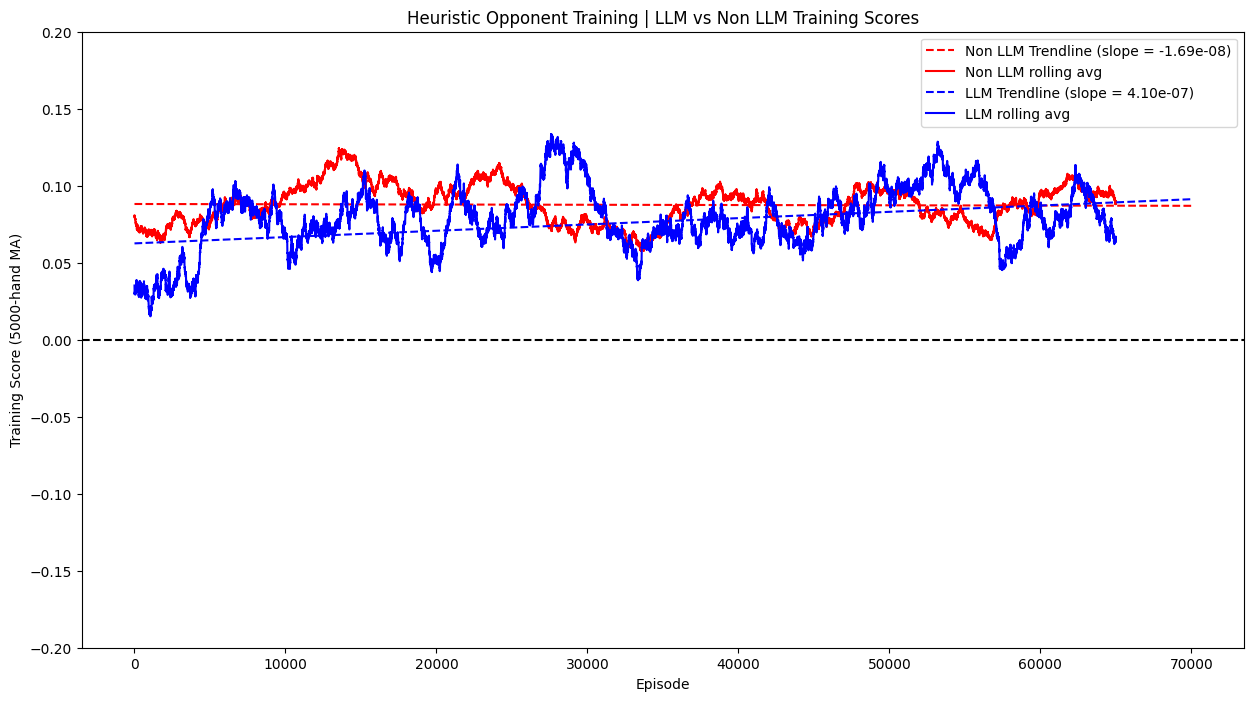

In [31]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load your train_scores dictionary
with open(r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores_heuristic_comparison.pkl", "rb") as f:
    train_scores = pickle.load(f)

with open(r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\heuristic_train_scores_LLM.pkl", "rb") as f:
    llm_train_scores = pickle.load(f)

slopes = []
plots = {}

# for key in train_scores:
window = 5000
x = np.arange(len(train_scores))
rolling = np.convolve(train_scores, np.ones(window)/window, mode='valid')
# Fit trendline
slope, intercept = np.polyfit(x, train_scores, 1)
trendline = slope * x + intercept

x_llm = np.arange(len(llm_train_scores))
rolling_llm = np.convolve(llm_train_scores, np.ones(window)/window, mode='valid')
slope_llm, intercept_llm = np.polyfit(x_llm, llm_train_scores, 1)
trendline_llm = slope_llm * x_llm + intercept_llm

plt.figure(figsize=(15, 8))
plt.plot(x, trendline, color='red', ls='--', label=f'Non LLM Trendline (slope = {slope:.2e})')
plt.plot(rolling, color='red', label=f'Non LLM rolling avg')
plt.plot(x_llm, trendline_llm, color='blue', ls='--', label=f'LLM Trendline (slope = {slope_llm:.2e})')
plt.plot(rolling_llm, color='blue', label=f'LLM rolling avg')
plt.axhline(0, color='k', ls='--')
plt.ylabel('Training Score ({}-hand MA)'.format(window))
plt.xlabel('Episode')
plt.title("Heuristic Opponent Training | LLM vs Non LLM Training Scores")
plt.ylim(-0.2, 0.2)
plt.legend()
plt.show()
